In [3]:
import http.client

conn = http.client.HTTPSConnection("api-football-v1.p.rapidapi.com")

headers = {
    'X-RapidAPI-Host': "api-football-v1.p.rapidapi.com",
    'X-RapidAPI-Key': "d632407ca8msh1f120f905143008p1526afjsn686a1dfc5287"
    }

conn.request("GET", "/v3/teams/statistics?league=140&season=2021&team=541", headers=headers)

res = conn.getresponse()
data = res.read()

print(data.decode("utf-8"))

{"get":"teams\/statistics","parameters":{"league":"140","season":"2021","team":"541"},"errors":[],"results":11,"paging":{"current":1,"total":1},"response":{"league":{"id":140,"name":"La Liga","country":"Spain","logo":"https:\/\/media.api-sports.io\/football\/leagues\/140.png","flag":"https:\/\/media.api-sports.io\/flags\/es.svg","season":2021},"team":{"id":541,"name":"Real Madrid","logo":"https:\/\/media.api-sports.io\/football\/teams\/541.png"},"form":"WDWWWWDLWDWWWWWWWDWLWDWDWWWWLWWWW","fixtures":{"played":{"home":16,"away":17,"total":33},"wins":{"home":11,"away":13,"total":24},"draws":{"home":4,"away":2,"total":6},"loses":{"home":1,"away":2,"total":3}},"goals":{"for":{"total":{"home":34,"away":35,"total":69},"average":{"home":"2.1","away":"2.1","total":"2.1"},"minute":{"0-15":{"total":6,"percentage":"8.70%"},"16-30":{"total":8,"percentage":"11.59%"},"31-45":{"total":9,"percentage":"13.04%"},"46-60":{"total":12,"percentage":"17.39%"},"61-75":{"total":11,"percentage":"15.94%"},"76-90"

In [18]:
import json
import pandas as pd
from pandas import json_normalize

In [19]:
decoded_data = data.decode('utf-8')
json_data = json.loads(decoded_data)

In [28]:
json_data.keys()

dict_keys(['get', 'parameters', 'errors', 'results', 'paging', 'response'])

In [31]:
print(json_data['response'])

{'league': {'id': 140, 'name': 'La Liga', 'country': 'Spain', 'logo': 'https://media.api-sports.io/football/leagues/140.png', 'flag': 'https://media.api-sports.io/flags/es.svg', 'season': 2021}, 'team': {'id': 541, 'name': 'Real Madrid', 'logo': 'https://media.api-sports.io/football/teams/541.png'}, 'form': 'WDWWWWDLWDWWWWWWWDWLWDWDWWWWLWWWW', 'fixtures': {'played': {'home': 16, 'away': 17, 'total': 33}, 'wins': {'home': 11, 'away': 13, 'total': 24}, 'draws': {'home': 4, 'away': 2, 'total': 6}, 'loses': {'home': 1, 'away': 2, 'total': 3}}, 'goals': {'for': {'total': {'home': 34, 'away': 35, 'total': 69}, 'average': {'home': '2.1', 'away': '2.1', 'total': '2.1'}, 'minute': {'0-15': {'total': 6, 'percentage': '8.70%'}, '16-30': {'total': 8, 'percentage': '11.59%'}, '31-45': {'total': 9, 'percentage': '13.04%'}, '46-60': {'total': 12, 'percentage': '17.39%'}, '61-75': {'total': 11, 'percentage': '15.94%'}, '76-90': {'total': 17, 'percentage': '24.64%'}, '91-105': {'total': 6, 'percentage'

In [40]:
responses = json_data['response']
print(responses.keys())

dict_keys(['league', 'team', 'form', 'fixtures', 'goals', 'biggest', 'clean_sheet', 'failed_to_score', 'penalty', 'lineups', 'cards'])


In [44]:
import numpy as np

In [45]:
headers = responses.items()

In [47]:
headers_list = list(headers)

my_array = np.array(headers_list, dtype='object')

In [48]:
print(my_array)

[['league'
  {'id': 140, 'name': 'La Liga', 'country': 'Spain', 'logo': 'https://media.api-sports.io/football/leagues/140.png', 'flag': 'https://media.api-sports.io/flags/es.svg', 'season': 2021}]
 ['team'
  {'id': 541, 'name': 'Real Madrid', 'logo': 'https://media.api-sports.io/football/teams/541.png'}]
 ['form' 'WDWWWWDLWDWWWWWWWDWLWDWDWWWWLWWWW']
 ['fixtures'
  {'played': {'home': 16, 'away': 17, 'total': 33}, 'wins': {'home': 11, 'away': 13, 'total': 24}, 'draws': {'home': 4, 'away': 2, 'total': 6}, 'loses': {'home': 1, 'away': 2, 'total': 3}}]
 ['goals'
  {'for': {'total': {'home': 34, 'away': 35, 'total': 69}, 'average': {'home': '2.1', 'away': '2.1', 'total': '2.1'}, 'minute': {'0-15': {'total': 6, 'percentage': '8.70%'}, '16-30': {'total': 8, 'percentage': '11.59%'}, '31-45': {'total': 9, 'percentage': '13.04%'}, '46-60': {'total': 12, 'percentage': '17.39%'}, '61-75': {'total': 11, 'percentage': '15.94%'}, '76-90': {'total': 17, 'percentage': '24.64%'}, '91-105': {'total': 6, 

In [49]:
print(my_array.shape)

(11, 2)


In [69]:
df = pd.DataFrame(my_array)

In [83]:
print(df)

                  0                                                  1
0            league  {'id': 140, 'name': 'La Liga', 'country': 'Spa...
1              team  {'id': 541, 'name': 'Real Madrid', 'logo': 'ht...
2              form                  WDWWWWDLWDWWWWWWWDWLWDWDWWWWLWWWW
3          fixtures  {'played': {'home': 16, 'away': 17, 'total': 3...
4             goals  {'for': {'total': {'home': 34, 'away': 35, 'to...
5           biggest  {'streak': {'wins': 7, 'draws': 1, 'loses': 1}...
6       clean_sheet                {'home': 8, 'away': 5, 'total': 13}
7   failed_to_score                 {'home': 4, 'away': 2, 'total': 6}
8           penalty  {'scored': {'total': 8, 'percentage': '100.00%...
9           lineups  [{'formation': '4-3-3', 'played': 29}, {'forma...
10            cards  {'yellow': {'0-15': {'total': 2, 'percentage':...


In [104]:
def count_wins(my_array):
    results = my_array[2,1]
    wins = 0
    losses = 0
    draws = 0
    for i in results:
        if i == 'W':
            wins += 1
        elif i == 'D':
            draws += 1
    losses = (len(results)) - wins - draws
    # adding wins, losses, and draws to an array
    form = np.array([wins, losses, draws])
    labels = np.array(['wins', 'losses', 'draws'])
    return labels, form

In [109]:
form_labels, form = count_wins(my_array)
print(form_labels, form)

['wins' 'losses' 'draws'] [24  3  6]


In [110]:
import matplotlib.pyplot as plt

In [111]:
colors = ['#FF0000', '#0000FF', '#FFFF00']
explode = (0.05, 0.05, 0.05)

([<matplotlib.patches.Wedge at 0x1478905e0>,
 [Text(-0.7530899032168136, 0.8691119592278606, 'wins'),
  Text(0.16366222872084257, -1.1382946344818317, 'losses'),
  Text(0.9674416685944142, -0.621736775385899, 'draws')],
 [Text(-0.5893747068653323, 0.6801745767870212, '72.7%'),
  Text(0.12808348334674635, -0.8908392791596942, '9.1%'),
  Text(0.7571282623782372, -0.48657660682374704, '18.2%')])

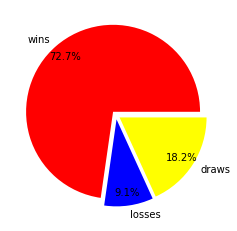

In [117]:
# Pie Chart
plt.pie(form, colors=colors, labels=form_labels,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)

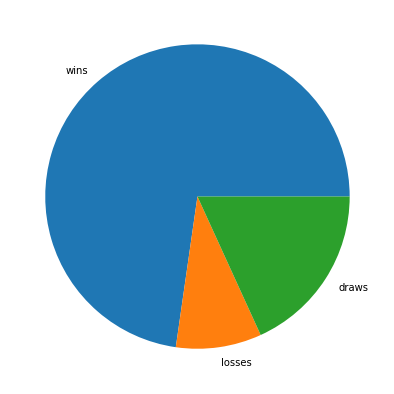

In [130]:
fig = plt.figure(figsize=(10,7))
plt.pie(form, labels=form_labels)
plt.show()

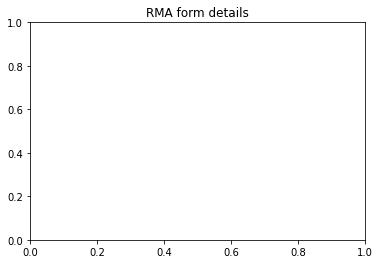